<a href="https://colab.research.google.com/github/takiyama0617/colaboratory/blob/master/sample_PyTorch_CIFAR_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10
10クラス(airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck)の教師ラベルが付いている32*32のカラー画像6万枚のデータセット

In [1]:
!pip install torch torchvision

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
# 学習データ
train_data_with_teacher_labels = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_data_loader = torch.utils.data.DataLoader(train_data_with_teacher_labels, batch_size=4, shuffle=True)

# 検証データ
test_data_with_teacher_labels = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_data_loader = torch.utils.data.DataLoader(test_data_with_teacher_labels, batch_size=4, shuffle=False)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def show_image(img) :
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

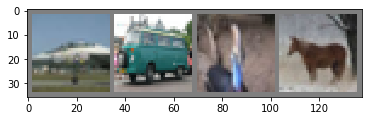

plane truck  bird horse


In [8]:
data_iterator = iter(train_data_loader)
images, labels = data_iterator.next()

show_image(torchvision.utils.make_grid(images))
print(' '.join('%5s' % class_names[labels[j]] for j in range(4)))

## 学習のニューラルネットワークの定義

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module) :
  def __init__(self) :
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.layer1 = nn.Linear(16 * 5 * 5, 120)
    self.layer2 = nn.Linear(120, 84)
    self.layer3 = nn.Linear(84, 10)
  
  def forward(self, input_data) :
    input_data = self.pool(F.relu(self.conv1(input_data)))
    input_data = self.pool(F.relu(self.conv2(input_data)))
    input_data = input_data.view(-1, 16 * 5 * 5)
    input_data = F.relu(self.layer1(input_data))
    input_data = F.relu(self.layer2(input_data))
    input_data = self.layer3(input_data)
    return input_data

model = CNN()

### optimizerの設定

In [0]:
import torch.optim as optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optimizer.SGD(model.parameters(), lr=0.001, momentum=0.9)

### 学習

In [22]:
# 最大学習回数
MAX_EPOCH = 5

for epoch in range(MAX_EPOCH) :
  total_loss = 0.0
  for i, data in enumerate(train_data_loader, 0) :
    # dataから学習データと教師データを取得
    train_data, teacher_labels = data

    # 計算された勾配情報を削除
    optimizer.zero_grad()

    # モデルでの予測を計算
    outputs = model(train_data)

    loss = criterion(outputs, teacher_labels)
    loss.backward()

    # 勾配を更新
    optimizer.step()

    total_loss += loss.item()

    if i % 2000 == 1999:
      print('学習進捗 : [%d, %5d] loss : %.3f' % (epoch + 1, i + 1, total_loss / 2000))
      total_loss = 0.0

print('学習完了')

学習進捗 : [1,  2000] loss : 1.063
学習進捗 : [1,  4000] loss : 1.116
学習進捗 : [1,  6000] loss : 1.090
学習進捗 : [1,  8000] loss : 1.106
学習進捗 : [1, 10000] loss : 1.091
学習進捗 : [1, 12000] loss : 1.103
学習進捗 : [2,  2000] loss : 1.013
学習進捗 : [2,  4000] loss : 1.025
学習進捗 : [2,  6000] loss : 1.028
学習進捗 : [2,  8000] loss : 1.038
学習進捗 : [2, 10000] loss : 1.020
学習進捗 : [2, 12000] loss : 1.033
学習進捗 : [3,  2000] loss : 0.927
学習進捗 : [3,  4000] loss : 0.963
学習進捗 : [3,  6000] loss : 0.983
学習進捗 : [3,  8000] loss : 0.963
学習進捗 : [3, 10000] loss : 0.987
学習進捗 : [3, 12000] loss : 0.984
学習進捗 : [4,  2000] loss : 0.878
学習進捗 : [4,  4000] loss : 0.907
学習進捗 : [4,  6000] loss : 0.922
学習進捗 : [4,  8000] loss : 0.926
学習進捗 : [4, 10000] loss : 0.940
学習進捗 : [4, 12000] loss : 0.963
学習進捗 : [5,  2000] loss : 0.838
学習進捗 : [5,  4000] loss : 0.859
学習進捗 : [5,  6000] loss : 0.887
学習進捗 : [5,  8000] loss : 0.874
学習進捗 : [5, 10000] loss : 0.896
学習進捗 : [5, 12000] loss : 0.925
学習完了


### 個別データで検証

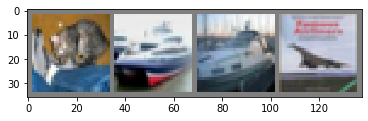

正解教師ラベル :    cat  ship  ship plane


In [23]:
data_iterator = iter(test_data_loader)
images, labels = data_iterator.next()

show_image(torchvision.utils.make_grid(images))
print('正解教師ラベル : ', ' '.join('%5s' % class_names[labels[j]] for j in range(4)))

In [25]:
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('予測 : ', ' '.join('%5s' % class_names[predicted[j]] for j in range(4)))

予測 :    dog   car truck plane


## 検証

In [26]:
count_when_correct = 0
total = 0
with torch.no_grad() :
  for data in test_data_loader :
    test_data, teacher_labels = data
    results = model(test_data)
    _, predicted = torch.max(results.data, 1)
    total += teacher_labels.size(0)
    count_when_correct += (predicted == teacher_labels).sum().item()

print('10000 検証画像に対しての正解率 : %d %%' % (100 * count_when_correct / total))

10000 検証画像に対しての正解率 : 62 %


### クラス毎の検証

In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad() :
  for data in test_data_loader:
    test_data, teacher_labels = data
    results = model(test_data)
    _, predicted = torch.max(results, 1)
    c = (predicted == teacher_labels).squeeze()

    for i in range(4) :
      label = teacher_labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10) :
  print(' %5s クラスの正解率は : %2d %%' % (class_names[i], 100 * class_correct[i] / class_total[i]))

 plane クラスの正解率は : 60 %
   car クラスの正解率は : 84 %
  bird クラスの正解率は : 49 %
   cat クラスの正解率は : 29 %
  deer クラスの正解率は : 59 %
   dog クラスの正解率は : 56 %
  frog クラスの正解率は : 71 %
 horse クラスの正解率は : 73 %
  ship クラスの正解率は : 66 %
 truck クラスの正解率は : 76 %
